<a href="https://colab.research.google.com/github/pallavi4114/student_result_analysis/blob/main/student_result_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Student Result Analysis

Import all the libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Loading Dataset

In [2]:
data=pd.read_csv("Expanded_data_with_more_features.csv")

In [3]:
data

,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74.0
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88.0
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91.0
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42.0
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,693,male,group D,high school,standard,none,married,sometimes,yes,1.0,school_bus,5 - 10,68,66,59.0
11036,694,male,NaN,some high school,standard,none,married,sometimes,yes,3.0,school_bus,5 - 10,86,83,76.0
11037,695,male,group C,NaN,free/reduced,none,married,regularly,yes,3.0,school_bus,5 - 10,53,48,52.0
11038,696,female,group B,high school,standard,completed,divorced,sometimes,yes,0.0,private,5 - 10,75,89,80.0


In [4]:
data.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,11040.000000,10472.000000,11040.000000,11040.000000,11039.000000
mean,491.028804,2.125000,66.689493,69.441757,68.449316
std,286.041837,1.471642,15.442964,14.747144,15.435190
min,0.000000,0.000000,0.000000,8.000000,6.000000
25%,245.000000,1.000000,56.000000,59.000000,58.000000
50%,488.000000,2.000000,67.000000,70.000000,69.000000
75%,733.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           11040 non-null  int64  
 1   Gender               11040 non-null  object 
 2   EthnicGroup          10375 non-null  object 
 3   ParentEduc           10382 non-null  object 
 4   LunchType            11040 non-null  object 
 5   TestPrep             10381 non-null  object 
 6   ParentMaritalStatus  10605 non-null  object 
 7   PracticeSport        10816 non-null  object 
 8   IsFirstChild         10678 non-null  object 
 9   NrSiblings           10472 non-null  float64
 10  TransportMeans       9900 non-null   object 
 11  WklyStudyHours       10701 non-null  object 
 12  MathScore            11040 non-null  int64  
 13  ReadingScore         11040 non-null  int64  
 14  WritingScore         11039 non-null  float64
dtypes: float64(2), int64(3), object(10)


In [6]:
data.isnull().sum()

Unnamed: 0                0
Gender                    0
EthnicGroup             665
ParentEduc              658
LunchType                 0
TestPrep                659
ParentMaritalStatus     435
PracticeSport           224
IsFirstChild            362
NrSiblings              568
TransportMeans         1140
WklyStudyHours          339
MathScore                 0
ReadingScore              0
WritingScore              1
dtype: int64

In [7]:
data=data.drop('Unnamed: 0',axis=1)

In [8]:
data.tail()

,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
11035,male,group D,high school,standard,none,married,sometimes,yes,1.0,school_bus,5 - 10,68,66,59.0
11036,male,NaN,some high school,standard,none,married,sometimes,yes,3.0,school_bus,5 - 10,86,83,76.0
11037,male,group C,NaN,free/reduced,none,married,regularly,yes,3.0,school_bus,5 - 10,53,48,52.0
11038,female,group B,high school,standard,completed,divorced,sometimes,yes,0.0,private,5 - 10,75,89,80.0
11039,female,group C,bachelor's degree,free/reduced,completed,divorced,sometimes,yes,2.0,school_bus,5 - 10,75,8,NaN


# Gender Distribution


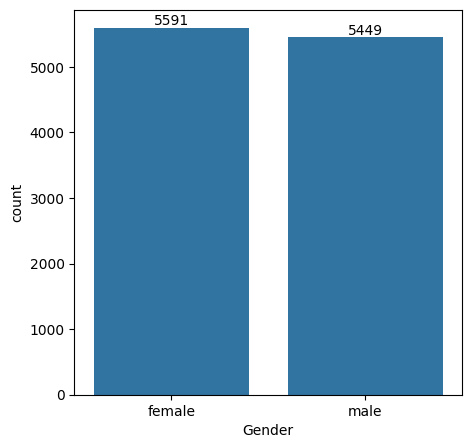

In [9]:
plt.figure(figsize=(5,5))
ax=sns.countplot(data=data,x='Gender')
ax.bar_label(ax.containers[0])
plt.show()

In [10]:
parentEducate_marks=data.groupby('ParentEduc').agg({ 'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(parentEducate_marks)

                    MathScore  ReadingScore  WritingScore
ParentEduc                                               
associate's degree  68.664493     71.435306     70.552156
bachelor's degree   70.554304     73.164119     73.448470
high school         64.259701     67.036318     65.079602
master's degree     72.488712     76.173971     76.857902
some college        66.506947     68.912421     68.194526
some high school    62.806178     65.812656     63.932735


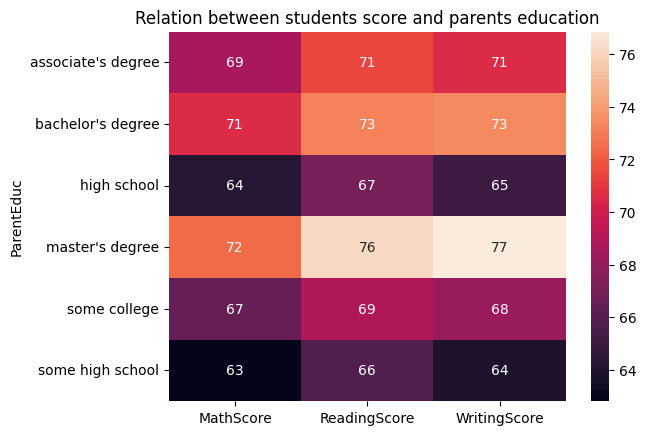

In [11]:
sns.heatmap(parentEducate_marks,annot=True)
plt.title("Relation between students score and parents education")
plt.show()

In [12]:
parentMarrital_marks=data.groupby('ParentMaritalStatus').agg({ 'MathScore':'mean','ReadingScore':'mean','WritingScore':'mean'})
print(parentMarrital_marks)

                     MathScore  ReadingScore  WritingScore
ParentMaritalStatus                                       
divorced             66.650255     69.607244     68.776331
married              66.821329     69.562633     68.517720
single               66.131811     68.921875     67.920673
widowed              69.392694     70.744292     69.995434


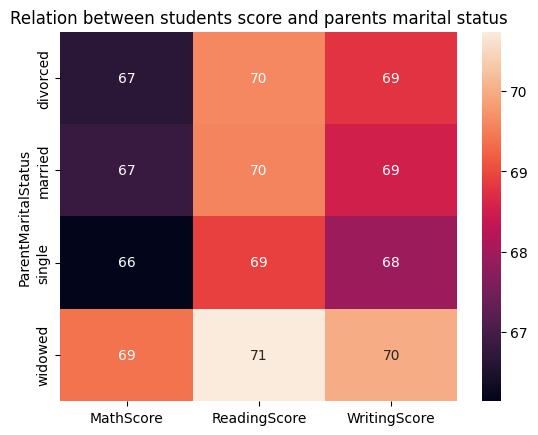

In [13]:
sns.heatmap(parentMarrital_marks,annot=True)
plt.title("Relation between students score and parents marital status")
plt.show()

# Detecting Outlier

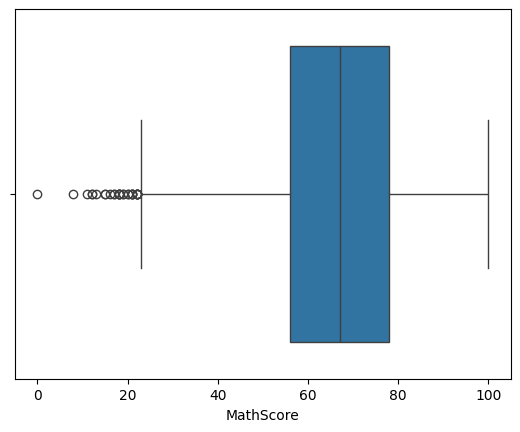

In [14]:
sns.boxplot(data=data,x="MathScore")
plt.show()

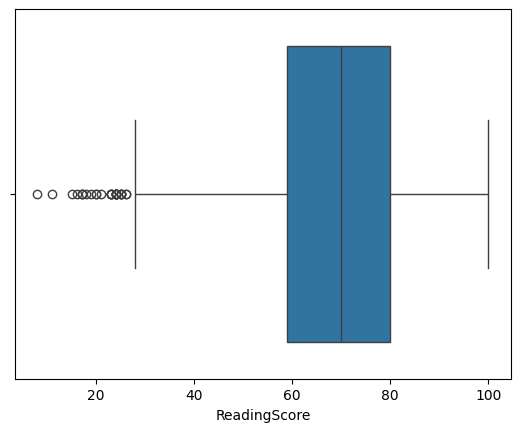

In [15]:
sns.boxplot(data=data,x="ReadingScore")
plt.show()

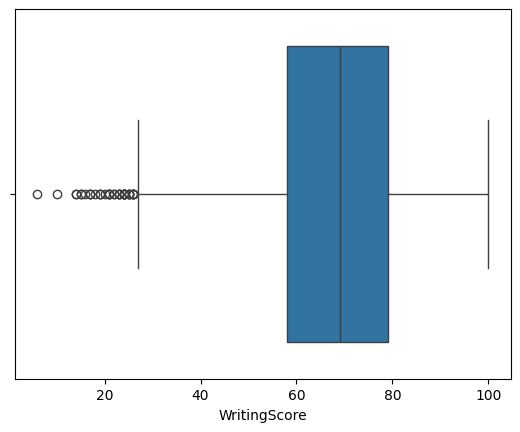

In [16]:
sns.boxplot(data=data,x="WritingScore")
plt.show()

In [17]:
data["EthnicGroup"].unique()

array([nan, 'group C', 'group B', 'group A', 'group D', 'group E'],
      dtype=object)

# Distribution of Ethnic Group


In [18]:
groupA=data.loc[(data["EthnicGroup"]=='group A')].count()
print(groupA)

Gender                 839
EthnicGroup            839
ParentEduc             778
LunchType              839
TestPrep               788
ParentMaritalStatus    798
PracticeSport          823
IsFirstChild           816
NrSiblings             783
TransportMeans         754
WklyStudyHours         813
MathScore              839
ReadingScore           839
WritingScore           839
dtype: int64


In [19]:
groupB=data.loc[(data["EthnicGroup"]=='group B')].count()
print(groupB)

Gender                 2111
EthnicGroup            2111
ParentEduc             1984
LunchType              2111
TestPrep               2000
ParentMaritalStatus    2037
PracticeSport          2062
IsFirstChild           2035
NrSiblings             2023
TransportMeans         1914
WklyStudyHours         2050
MathScore              2111
ReadingScore           2111
WritingScore           2111
dtype: int64


In [20]:
groupC=data.loc[(data["EthnicGroup"]=='group C')].count()
print(groupC)

Gender                 3277
EthnicGroup            3277
ParentEduc             3072
LunchType              3277
TestPrep               3077
ParentMaritalStatus    3141
PracticeSport          3223
IsFirstChild           3173
NrSiblings             3126
TransportMeans         2928
WklyStudyHours         3180
MathScore              3277
ReadingScore           3277
WritingScore           3276
dtype: int64


In [21]:
groupD=data.loc[(data["EthnicGroup"]=='group D')].count()
print(groupD)

Gender                 2659
EthnicGroup            2659
ParentEduc             2510
LunchType              2659
TestPrep               2497
ParentMaritalStatus    2553
PracticeSport          2606
IsFirstChild           2574
NrSiblings             2521
TransportMeans         2379
WklyStudyHours         2573
MathScore              2659
ReadingScore           2659
WritingScore           2659
dtype: int64


In [22]:
groupE=data.loc[(data["EthnicGroup"]=='group E')].count()
print(groupE)

Gender                 1489
EthnicGroup            1489
ParentEduc             1417
LunchType              1489
TestPrep               1401
ParentMaritalStatus    1448
PracticeSport          1454
IsFirstChild           1438
NrSiblings             1403
TransportMeans         1330
WklyStudyHours         1446
MathScore              1489
ReadingScore           1489
WritingScore           1489
dtype: int64


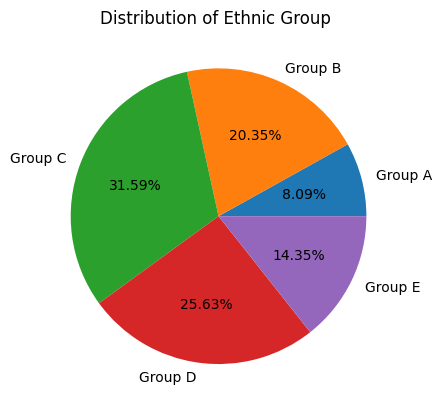

In [23]:
grp=[groupA["EthnicGroup"],groupB["EthnicGroup"],groupC["EthnicGroup"],groupD["EthnicGroup"],groupE["EthnicGroup"]]
plt.pie(grp,labels=["Group A","Group B","Group C","Group D","Group E"],autopct="%1.2f%%")
plt.title("Distribution of Ethnic Group ")
plt.show()

# Getting Numbers of Student by Ethnic Group in Bar Plot.


[Text(0, 0, '3277'),
 Text(0, 0, '2111'),
 Text(0, 0, '839'),
 Text(0, 0, '2659'),
 Text(0, 0, '1489')]

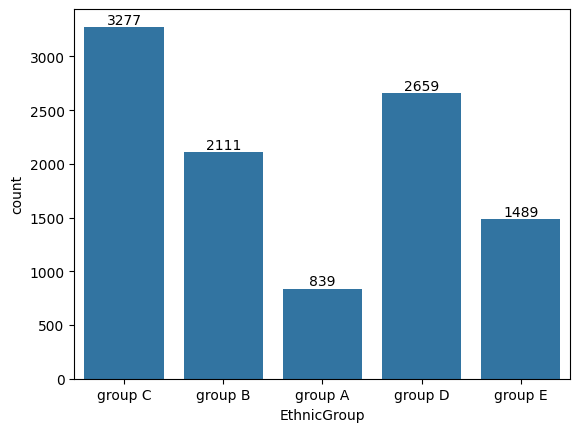

In [24]:
ax = sns.countplot(data = data, x ='EthnicGroup')
ax.bar_label(ax.containers[0])


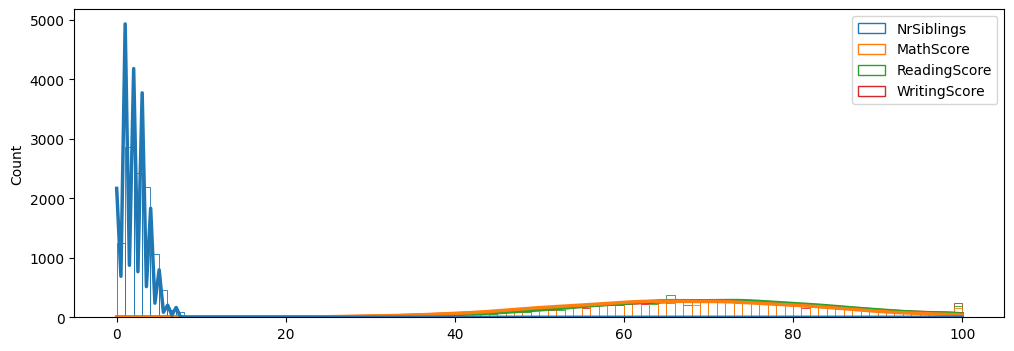

In [25]:
plt.figure(figsize=(12,4))
x = sns.histplot(data, bins = 100, kde = True, fill = False, line_kws = {"lw":2.5})

#  Visualize the distribution of numerical columns using violin plots

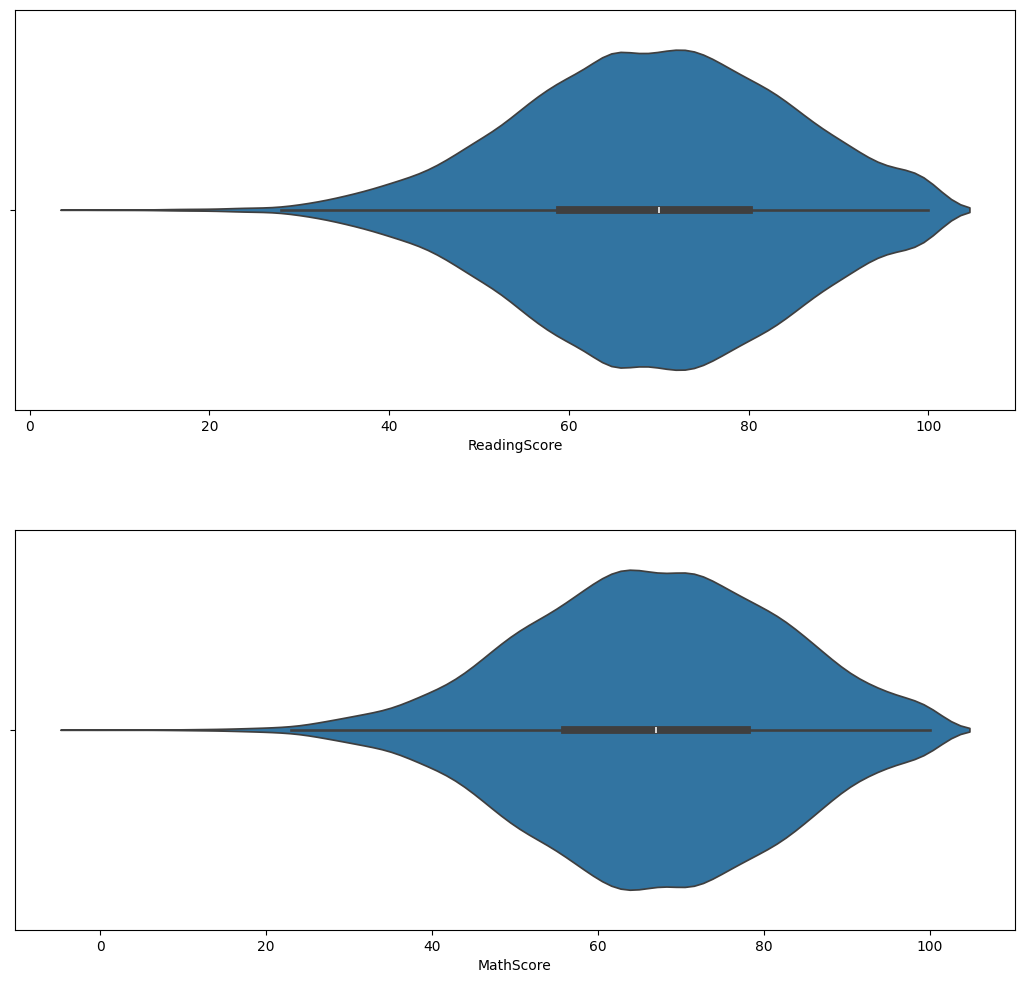

In [26]:
k = 1
canvas = plt.figure(figsize=(10,4))
for i in data.columns[data.dtypes == "int64"]:
    g1 = canvas.add_axes([1,k,1,1])
    sns.violinplot(x = "{}".format(i), data = data)
    k += 1.3